# Vorbereitung

In [1]:
%env KERAS_BACKEND=theano
%env THEANO_FLAGS=floatX=float32,device=cpu

env: KERAS_BACKEND=theano
env: THEANO_FLAGS=floatX=float32,device=cpu


In [2]:
%load_ext autoreload
%autoreload 1
%aimport bb_behavior
%aimport bb_behavior.plot
%aimport bb_behavior.tracking
%aimport bb_behavior.tracking.pipeline

import bb_behavior
import bb_behavior.plot
import bb_behavior.tracking
import bb_behavior.tracking.pipeline

import pandas as pd
import time
import datetime

Using Theano backend.


# Preprocessing

## Preprocessing step 1: convert the h264 to mp4

In [80]:
import glob
import os
import subprocess

videos = "../videos/videos_tags/videos_tags_mp4"

if not os.path.exists(videos):
    os.mkdir(videos)

In [82]:
for video in glob.glob(os.path.join('../videos/videos_tags/', '*.h264')):  
    path = os.path.split(video)   
    video_mp4 = os.path.join(path[0],"videos_tags_mp4",os.path.splitext(path[1])[0] + '.mp4')

    print(video_mp4)
    subprocess.call(['ffmpeg', '-framerate', '10', '-fflags', '+genpts', '-i', video, '-c', 'copy', video_mp4])

../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-01-08-13.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-01-08-33.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-01-08-54.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-02-20-55.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-02-21-16.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-02-21-37.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-02-21-58.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-02-22-19.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-02-22-40.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-02-23-01.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-02-23-22.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-02-23-43.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-02-24-04.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-02-24-25.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-02-25-33.mp4
../videos/

../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-04-16-05.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-04-16-26.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-04-23-27.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-04-23-48.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-04-26-48.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-04-27-09.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-04-27-47.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-04-28-08.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-04-29-46.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-04-30-07.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-04-30-28.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-04-32-11.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-04-32-32.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-04-32-53.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-04-37-00.mp4
../videos/

../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-06-01-59.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-06-02-41.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-06-03-02.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-06-03-23.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-06-03-53.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-06-04-14.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-06-04-50.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-06-05-11.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-06-05-32.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-06-05-53.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-06-06-14.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-06-06-35.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-06-06-50.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-06-07-11.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-06-07-44.mp4
../videos/

../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-01-02.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-01-46.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-02-07.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-02-21.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-02-42.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-03-03.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-03-24.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-03-45.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-04-06.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-04-22.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-04-43.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-05-24.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-05-45.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-06-24.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-06-55.mp4
../videos/

../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-49-06.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-49-32.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-49-53.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-50-14.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-50-23.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-50-44.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-51-24.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-51-45.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-52-06.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-52-27.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-52-48.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-53-09.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-53-20.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-53-41.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-07-54-59.mp4
../videos/

../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-08-34-22.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-08-34-45.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-08-35-06.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-08-35-18.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-08-35-39.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-08-35-55.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-08-36-16.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-08-36-37.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-08-36-58.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-08-37-19.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-08-37-40.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-08-38-01.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-08-38-22.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-08-39-04.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-08-39-25.mp4
../videos/

../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-09-21-32.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-09-21-53.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-09-22-14.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-09-22-35.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-09-22-56.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-09-23-17.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-09-23-38.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-09-23-59.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-09-24-20.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-09-24-41.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-09-25-02.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-09-25-23.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-09-25-44.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-09-26-26.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-09-26-47.mp4
../videos/

../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-00-02.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-00-23.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-00-44.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-01-05.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-01-26.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-01-47.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-02-08.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-02-29.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-02-54.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-03-36.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-03-57.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-04-18.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-04-39.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-04-51.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-05-11.mp4
../videos/

../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-50-24.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-50-45.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-51-06.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-51-25.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-51-46.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-52-07.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-52-23.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-52-44.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-53-24.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-53-45.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-54-22.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-54-28.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-54-49.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-56-25.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-10-56-48.mp4
../videos/

../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-11-40-21.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-11-40-42.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-11-41-03.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-11-41-24.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-11-41-45.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-11-42-06.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-11-42-16.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-11-42-37.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-11-42-58.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-11-43-40.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-11-44-02.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-11-44-23.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-11-44-44.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-11-45-05.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-11-45-26.mp4
../videos/

../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-11-38-29.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-11-43-19.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-11-48-35.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-11-54-15.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-11-59-24.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-12-04-38.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-12-09-53.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-12-15-44.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-12-20-57.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-12-26-32.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-12-26-53.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-12-27-14.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-12-27-35.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-12-27-56.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-12-28-17.mp4
../videos/

../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-09-52.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-10-13.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-10-34.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-10-55.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-11-16.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-11-37.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-11-58.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-12-19.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-12-40.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-13-01.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-13-43.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-14-04.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-14-25.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-14-46.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-15-07.mp4
../videos/

../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-52-18.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-52-38.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-52-47.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-53-08.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-53-22.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-53-43.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-54-04.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-54-25.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-54-46.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-55-22.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-56-04.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-56-42.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-57-03.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-57-24.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-13-57-45.mp4
../videos/

../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-14-47-05.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-14-47-44.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-14-48-05.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-14-48-23.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-14-48-44.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-14-49-05.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-14-49-28.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-14-49-48.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-14-50-09.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-14-50-30.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-14-51-12.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-14-51-33.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-14-51-54.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-14-52-15.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-14-52-36.mp4
../videos/

../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-15-41-42.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-15-42-03.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-15-42-24.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-15-42-45.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-15-43-06.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-15-43-27.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-15-43-48.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-15-44-09.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-15-44-30.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-15-44-51.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-15-45-33.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-15-45-54.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-15-46-15.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-15-46-36.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-15-46-57.mp4
../videos/

../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-15-34-42.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-15-39-57.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-15-45-12.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-15-50-27.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-15-55-42.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-16-00-57.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-16-06-12.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-16-11-49.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-16-17-03.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-16-22-35.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-16-28-11.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-16-28-32.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-16-28-53.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-16-29-14.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-16-29-35.mp4
../videos/

../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-17-11-10.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-17-11-20.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-17-11-41.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-17-12-02.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-17-12-23.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-17-12-44.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-17-13-05.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-17-13-26.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-17-13-44.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-17-14-05.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-17-14-26.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-17-15-08.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-17-15-29.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-17-15-50.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-17-16-11.mp4
../videos/

../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-17-59-07.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-17-59-28.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-17-59-49.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-00-10.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-00-31.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-00-52.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-01-13.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-01-34.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-01-55.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-02-16.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-02-58.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-03-19.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-03-40.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-04-01.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-04-22.mp4
../videos/

../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-46-00.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-46-21.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-46-42.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-47-03.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-47-24.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-47-45.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-48-06.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-48-27.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-48-48.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-49-09.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-49-30.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-50-12.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-50-33.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-50-54.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-18-51-15.mp4
../videos/

../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-19-31-21.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-19-31-42.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-19-32-03.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-19-34-47.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-19-35-08.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-19-37-03.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-19-37-24.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-19-37-45.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-19-37-51.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-19-38-12.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-19-38-33.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-19-39-15.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-19-39-36.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-19-39-57.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-19-40-18.mp4
../videos/

../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-19-21-30.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-19-29-57.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-19-38-54.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-19-44-23.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-19-49-32.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-19-59-44.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-20-09-55.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-20-15-10.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-20-23-59.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-20-34-48.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-20-42-34.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-20-52-55.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-20-42-55.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-20-43-16.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-20-43-37.mp4
../videos/

## Run

In [3]:
from bb_behavior.tracking.pipeline import get_default_pipeline
default_pipeline = None
default_pipeline = get_default_pipeline(localizer_threshold="0.50")

/home/tscho/.local/lib/python3.6/site-packages/keras/backend/theano_backend.py:1032: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
  mode='max')
/home/tscho/.local/lib/python3.6/site-packages/keras/backend/theano_backend.py:1032: UserWarning: DEPRECATION: the 'st' parameter is not going to exist anymore as it is going to be replaced by the parameter 'stride'.
  mode='max')
/home/tscho/.local/lib/python3.6/site-packages/keras/backend/theano_backend.py:1032: UserWarning: DEPRECATION: the 'padding' parameter is not going to exist anymore as it is going to be replaced by the parameter 'pad'.
  mode='max')


In [4]:
from tqdm import tqdm_notebook # progress bar

import math
import numpy as np
from bb_tracking.data.constants import DETKEY
#from bb_tracking.tracking import score_id_sim_v
from bb_tracking.tracking import distance_orientations_v, distance_positions_v

from bb_behavior.tracking.pipeline import detect_markers_in_video
from bb_behavior.tracking.pipeline import track_detections_dataframe
from bb_behavior.tracking.pipeline import display_tracking_results

In [5]:
config = dict(tag_pixel_diameter=50,
              n_frames=None,
              confidence_filter_detections=0.08,
              confidence_filter_tracks=0.20,
              coordinate_scale=1.0,
              start_time=None,
              fps=10.0,
              cam_id=0,
              left_leaving_area = 0.30, # Prozente vom Bildschirmrand, zB. bei 1000px und 0.15 -> 0-150px
              right_leaving_area = 0.30,
              px_x_resolution_vid = 1944)


In [6]:
import time
import os

def filename_to_datestring(filname):
    """
    filename can be path
    """
    return os.path.split(filname)[-1].split('.')[0].split('_')[-1]


def string_to_timestamp(datestring):
    """ 
    params
        string: format 2018-08-19-01-08-13
    output
        unix timestamp (float)
    """
    
    return time.mktime(time.strptime(datestring, "%Y-%m-%d-%H-%M-%S"))

def timestamp_to_string(timestamp):
    return time.strftime("%Y-%m-%d-%H-%M-%S", time.localtime(timestamp))

In [7]:
# Einen Iterable speichern, der alle Videos in einem Iterable zur Verfügung stellt
# Diesen Iterable können wir dann in der nächsten Zelle mit tqdm schön durchlaufen
# nicht sehr performant --> O(n)
import os
base_directory = "../videos/"
paths = [i for i in os.listdir(base_directory) if i.endswith(".h264")]
for i in range(len(paths)):
    paths[i] = base_directory + paths[i]

In [23]:
glob.glob(os.path.join('../videos/videos_tags/', '*.h264'))[:5]

['../videos/videos_tags/e00_2018-08-19-01-08-13.h264',
 '../videos/videos_tags/e00_2018-08-19-01-08-33.h264',
 '../videos/videos_tags/e00_2018-08-19-01-08-54.h264',
 '../videos/videos_tags/e00_2018-08-19-02-20-55.h264',
 '../videos/videos_tags/e00_2018-08-19-02-21-16.h264']

In [24]:
# Hier passiert das eigentliche Tracken und speichern der Ergebnisse:
num_processed_videos = 0
video_data = dict()
frame_info = None
detections = None
videos_w_no_detection = ""
import glob

paths = glob.glob(os.path.join('../videos/videos_tags/', '*.h264'))[:5]
#paths = ['../videos/videos_tags/e00_2018-08-19-02-20-55.h264']

bad_paths = []
for path in tqdm_notebook(paths):
    start_time = config["start_time"]
    cam_id = config["cam_id"]
    try:
        
        num_processed_videos += 1

        frame_info, detections = detect_markers_in_video(path,
                                                      decoder_pipeline=default_pipeline,#pipeline=pipelines(),
                                                     tag_pixel_diameter=config["tag_pixel_diameter"],
                                                      n_frames=config["n_frames"],
                                                      fps=config["fps"],
                                                     progress="tqdm_notebook"
                                            )
        tracks = track_detections_dataframe(detections,
                                            tracker="../tracker.det_score_fun.frag_score_fun.dill",
                                            confidence_filter_detections=config["confidence_filter_detections"],
                                           confidence_filter_tracks=config["confidence_filter_tracks"],
                                            coordinate_scale=config["coordinate_scale"]
                                           )
        date_string = filename_to_datestring(path)
        tracks['video'] = date_string
        video_data[path] = (frame_info, detections, tracks)
    except ValueError as err: #tritt auf, wenn Video leer ist. In diesem Fall: überspringe video
        try:
            videos_w_no_detection = videos_w_no_detection + path + "\n"
            bad_paths.append(path)
            # wir arbeiten später nochmal mit paths, daher müssen das leere löschen, weil sonst
            # in video_data kein zugehöriger Value zu Key = file zu finden ist.
        except KeyError as err:
            print(err)
            #continue
            raise
    except Exception as err:
        print(err)
        raise
    # only first vid: break

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.0. This might lead to breaking code 

###############  ../videos/videos_tags/e00_2018-08-19-01-08-13.h264


Widget Javascript not detected.  It may not be installed or enabled properly.


###############  ../videos/videos_tags/e00_2018-08-19-01-08-33.h264


/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.0. This might lead to breaking code 

############### 1  ../videos/videos_tags/e00_2018-08-19-01-08-54.h264


Widget Javascript not detected.  It may not be installed or enabled properly.


###############  ../videos/videos_tags/e00_2018-08-19-02-20-55.h264


/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.0. This might lead to breaking code 

/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.0. This might lead to breaking code 

###############  ../videos/videos_tags/e00_2018-08-19-02-21-16.h264


In [27]:
for path in bad_paths:
    paths.remove(path)

[None]

In [36]:
# gebe Videos aus, in denen keine Bienen gefunden wurden
if videos_w_no_detection:
    print("In the following file(s) were no bees detected:")
    print(videos_w_no_detection)

In the following file(s) were no bees detected:
../videos/videos_tags/e00_2018-08-19-01-08-54.h264



In [31]:
paths

['../videos/videos_tags/e00_2018-08-19-01-08-13.h264',
 '../videos/videos_tags/e00_2018-08-19-01-08-33.h264',
 '../videos/videos_tags/e00_2018-08-19-02-20-55.h264',
 '../videos/videos_tags/e00_2018-08-19-02-21-16.h264']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Found 138 detections belonging to 2 unique tracks and 1 individuals.


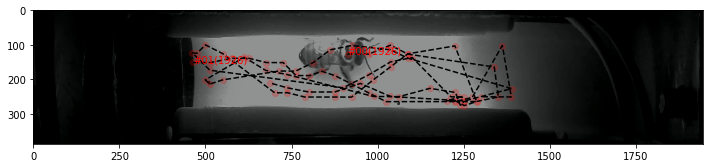

Detection/track statistics:


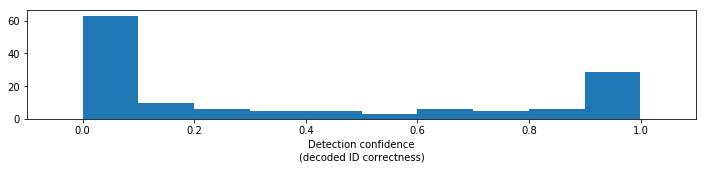

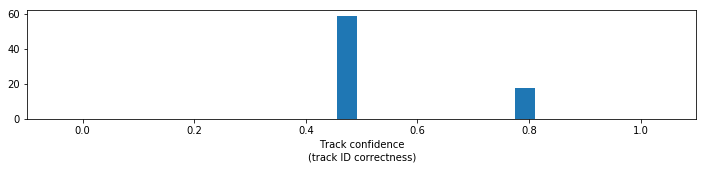

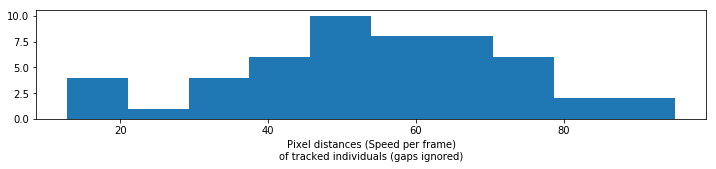

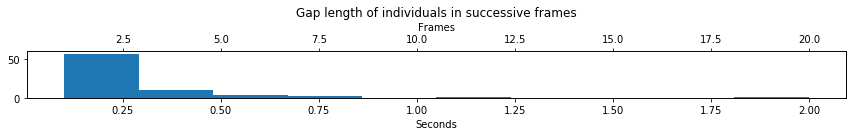

Individual statistics:


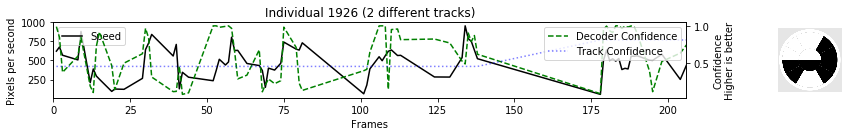

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Found 14 detections belonging to 1 unique tracks and 1 individuals.


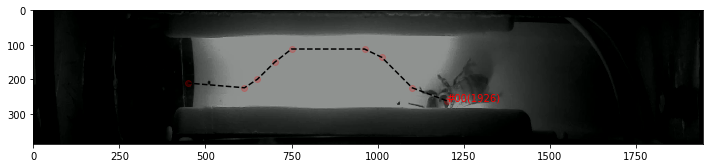

Detection/track statistics:


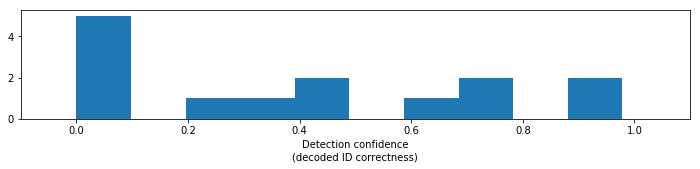

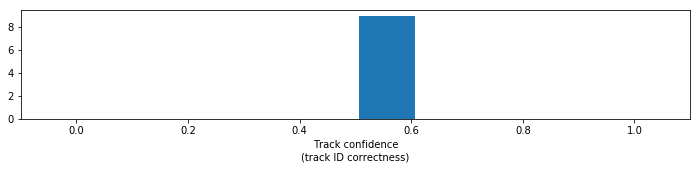

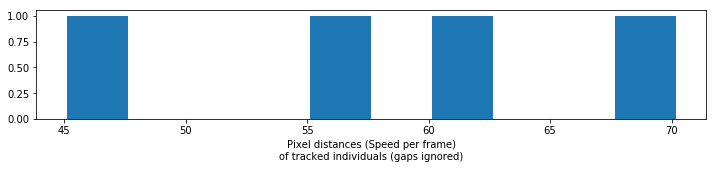

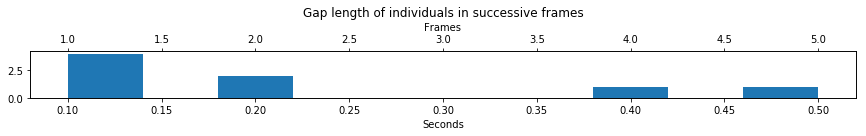

Individual statistics:


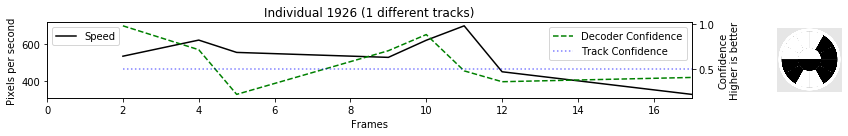

Found 42 detections belonging to 0 unique tracks and 0 individuals.
No tracks found. You might need to lower the confidence thresholds.


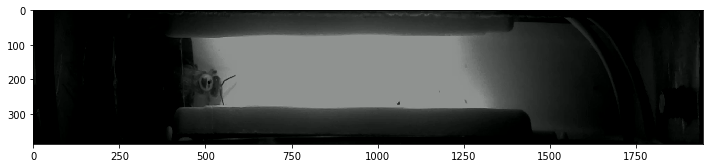

Detection/track statistics:


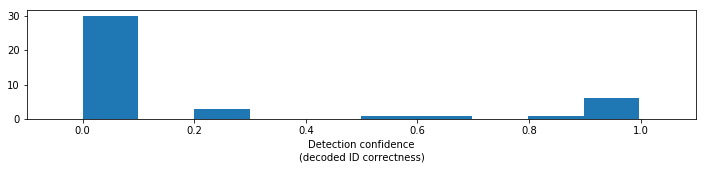

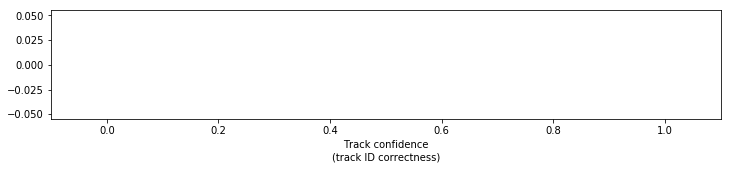

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Individual statistics:
Found 50 detections belonging to 1 unique tracks and 1 individuals.


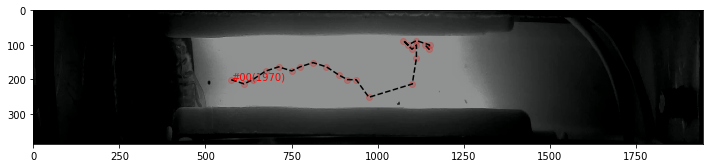

Detection/track statistics:


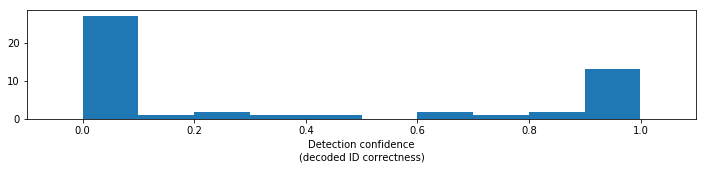

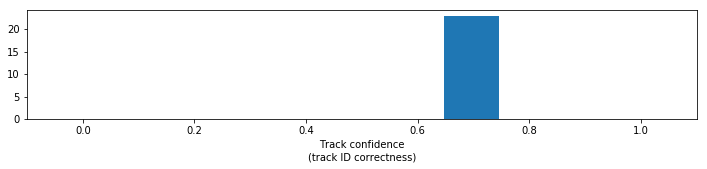

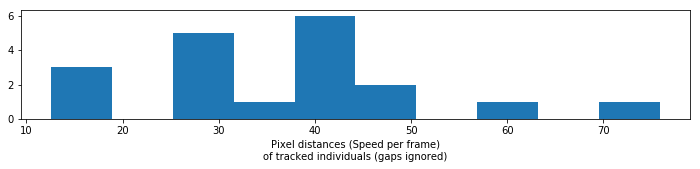

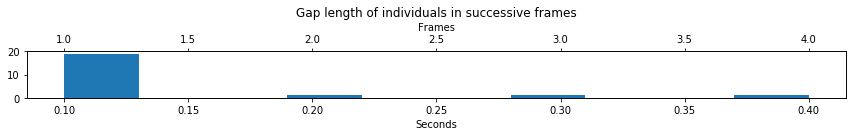

Individual statistics:


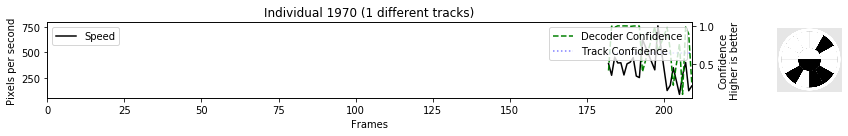

In [32]:
#video_data["file"][0] --> frame-info, [1] --> detections, [2] --> tracks
for path in paths:
    display_tracking_results(path, video_data[path][0], video_data[path][1], video_data[path][2])

# Modify data to default for all Algorithms / Save detection to .csv

In [33]:
video_data.keys()

dict_keys(['../videos/videos_tags/e00_2018-08-19-01-08-13.h264', '../videos/videos_tags/e00_2018-08-19-01-08-33.h264', '../videos/videos_tags/e00_2018-08-19-02-20-55.h264', '../videos/videos_tags/e00_2018-08-19-02-21-16.h264'])

In [34]:
tracks = [video_data[paths[x]][2] for x in range(len(paths))]
tracks = pd.concat(tracks,ignore_index=True)
tracks = tracks.drop(columns=["localizerSaliency", "beeID", "camID", "frameIdx"])

In [37]:
with open("tracks.csv", "w") as f:
    tracks.to_csv(f)

In [35]:
tracks

id         xpos        ypos  zrotation  timestamp  \
0    f17935491046629169753d0c0   912.430529  126.998674   0.089175        0.0   
1    f13125396014974250062d0c0   974.536364  126.958956  -0.139244        0.1   
2    f14440570301061130574d0c0  1037.021482  101.192688   0.149191        0.2   
3    f12321255971781753571d0c0  1087.552650  127.151928   0.046847        0.3   
4    f13004358549012596113d0c0  1338.424925  164.536581   0.453663        0.8   
5    f17088102069388261821d0c0  1350.450512  251.511379   0.762444        0.9   
6    f17401187680394706660d0c0  1288.500061  264.334076   1.831062        1.2   
7    f11581093344419819281d0c0  1251.583313  276.582163   2.030447        1.3   
8    f13956612143084617408d0c0  1225.343004  262.749094   2.077405        1.4   
9    f10393934655036901114d0c0  1199.793835  262.587893   2.071011        1.5   
10   f14036950583226250778d0c0  1237.002728  252.246141   1.354921        1.9   
11   f13664349624656580851d0c0  1249.751928  252.316618   1.356605        2.0   
12   f15892542354637157590d0c0  1212.585613  251.046106   1.911840        2.3   
13   f11568560779890769062d0c0  1100.214621  137.020755   2.929905        2.9   
14   f15818229344243204626d0c0  1037.248207  149.765671   2.862350        3.0   
15   f17859765343067889051d0c0   974.797939  186.875999   2.940625        3.1   
16   f16849206392635388157d0c0   899.907976  224.794537   2.929191        3.2   
17   f12081245658625428649d0c0   512.545910  173.826654  -2.718555        3.9   
18   f14580080958755281807d0c0   462.318939  123.780151  -2.803945        4.0   
19   f10641415419866139063d0c0   475.328827  124.561377  -2.564812        4.1   
20   f16635182973712174631d0c0   500.037893  100.370214  -2.199430        4.2   
21   f10201252642517389373d0c0   550.284296  125.818430  -2.046808        4.4   
22   f16203239787101233763d0c0   700.926397  239.370995   0.012262        5.2   
23    f9347022558506420621d0c0   737.903605  239.202671   0.099328        5.3   
24   f17453630791900361977d0c0   787.924332  251.649174   0.042063        5.4   
25   f14370321282577911788d0c0   876.098997  251.751900   0.097061        5.6   
26   f15614026113979383771d0c0   924.172266  251.885616  -0.174295        5.7   
27   f18081204127908745484d0c0   987.101892  201.976925  -0.310424        5.8   
28   f10077377188853114869d0c0  1037.333723  164.084034  -0.400137        5.9   
29   f11823095389895473407d0c0  1087.914301  126.194609  -0.280648        6.0   
..                         ...          ...         ...        ...        ...   
79   f12532074799627962972d0c0  1012.022131  136.453913  -2.851614        0.4   
80   f16777892665684102631d0c0   961.832132  112.378809  -3.006481        0.5   
81   f17380336918118159852d0c0   749.987551  112.312946  -3.006884        0.9   
82   f12651708385659427782d0c0   700.933931  150.717690   2.846610        1.0   
83   f12672770028956084052d0c0   650.891922  199.905893   2.776478        1.1   
84   f12607175004741095798d0c0   613.299440  224.838028   2.395222        1.2   
85   f13020849285352620650d0c0   449.986584  211.265169  -2.960266        1.7   
86   f17907219724343832096d0c0   574.795868  201.450317  -0.429178       18.1   
87   f11678326059634994914d0c0   611.992128  213.504074  -0.618155       18.2   
88   f17627786869240681067d0c0   636.866999  201.481583  -0.468161       18.3   
89   f12999887728055940184d0c0   674.603270  176.360580  -0.561210       18.4   
90   f15900050771688556097d0c0   712.320061  164.131838  -0.403021       18.5   
91    f9627397602356835698d0c0   750.363724  175.947411  -0.327996       18.6   
92   f16661284142126768433d0c0   775.487125  163.738482  -0.372622       18.7   
93   f12220309071481176987d0c0   812.419069  151.825905  -0.235277       18.8   
94   f10316204947411963582d0c0   850.899527  163.954487  -0.251603       18.9   
95   f10351204658260907601d0c0   888.458363  188.532408  -0.187645       19.0   
96   f18105656433669484456d0c0   912.270699  201.044498  -0

In [ ]:
# ERGEBNIS-DICT, kann mit pd.DataFrame(data=bee_moves) in DataFrame gewandelt werden
bee_moves = {"bee_id":[], "time_in":[], "os_in":[], "time_out":[], "os_out":[], "in_direction":[], "out_direction":[]}

# Algorithmus 1: Baseline

In [ ]:
""" Vorgehen:
Für jedes Video
- Prüfe, wo sich die Biene beim ersten erkannten Erscheinen aufhält
    - Ordne die Position in left, right oder middle ein
- Prüfe, wo sich die Biene beim letzten erkannten Erscheinen aufhält
    - Ordne die Position in left, right oder middle ein
Daraus kann nun abgeleitet werden, wo die Biene reingekommen ist und wo sie rausgegangen ist
"""
    
#nimmt dateinamen, der die aufnahmezeit enthält, und wandelt sie in einen float um
def get_time_from_path(path):
    date_string = os.path.split(path)[-1].split('.')[0].split('_')[1]
    timestamp = time.mktime(datetime.datetime.strptime(date_string, "%Y-%m-%d-%H-%M-%S").timetuple())
    return timestamp

def baseline_alg():
    video_group = data.groupby(["video"])
    for i in range(len(tracks["video"])):
        # Konvention: Jede bee_id hat eine zugehörige Liste der Form
        # "bee_id" : [(x_start, y_start),(x_bisher_letzter, y_bisher_letzter), zeit_erstes_erscheinen, zeit_letztes_erscheinen]
        movement = dict()
        recording_begin = get_time_from_path(paths[i])

        # Finde start- und endposition
        for row in video_data[paths[i]][2].itertuples():
            bee_id = row[13]
            xpos = row[4]
            ypos = row[5]
            timestamp = row[8]

            if bee_id in movement.keys():
                if not movement[bee_id]: #hier wird value betrachtet
                    movement[bee_id] = [(xpos, ypos), (xpos, ypos), timestamp + recording_begin, timestamp + recording_begin]
                else:
                    movement[bee_id][1] = (xpos, ypos)
                    movement[bee_id][3] = timestamp + recording_begin
            else:
                movement[bee_id] = [(xpos, ypos), (xpos, ypos), timestamp + recording_begin, timestamp + recording_begin]

        def is_left(xpos):
            return xpos <= config["left_leaving_area"]*config["px_x_resolution_vid"]
        def is_right(xpos):
            return xpos >= config["px_x_resolution_vid"] - config["right_leaving_area"]*config["px_x_resolution_vid"]

        # Setze labels, entferne andere Daten
        for bee_id in movement.keys():
            start_pos = movement[bee_id][0]
            end_pos = movement[bee_id][1]
            labels = dict()

            # Eintrittsseite festlegen
            if is_left(start_pos[0]):
                labels["in_direction"] = "left"
            elif is_right(start_pos[0]):
                labels["in_direction"] = "right"
            else:
                labels["in_direction"] = "middle"

            # Austrittsseite festlegen
            if is_left(end_pos[0]):
                labels["out_direction"] = "left"
            elif is_right(end_pos[0]):
                labels["out_direction"] = "right"
            else:
                labels["out_direction"] = "middle"

            bee_moves["bee_id"].append(bee_id)
            bee_moves["in_direction"].append(labels["in_direction"])
            bee_moves["out_direction"].append(labels["out_direction"])
            bee_moves["in_timestamp"].append(movement[bee_id][2])
            bee_moves["out_timestamp"].append(movement[bee_id][3])

In [ ]:
# Ausgeben
baseline_alg()
bee_moves = pd.DataFrame(data=bee_moves)
bee_moves

# Vergleichsfunktion Algorithmus mit Labels

In [ ]:
# gelabelted Datensatz einlesen:
labeled_data = pd.read_csv("labels.csv")
labeled_data = labeled_data.filter(["bee_id", "video", "in_direction", "out_direction"])

# nur ein Video betrachten:
#labeled_data = labeled_data[labeled_data["video"] == "e00_2018-08-19-12-34-35.h264"].drop(columns=["video"])

# Vergleichen

for bee_id in results["bee_id"]:
    if results[bee_id] in labeled_data["bee_id"]:
        if results[bee_id]
    

# Zwischenschritt für ML-Algorithmus

In [39]:
tracks.head()

id         xpos        ypos  zrotation  timestamp  \
0  f17935491046629169753d0c0   912.430529  126.998674   0.089175        0.0   
1  f13125396014974250062d0c0   974.536364  126.958956  -0.139244        0.1   
2  f14440570301061130574d0c0  1037.021482  101.192688   0.149191        0.2   
3  f12321255971781753571d0c0  1087.552650  127.151928   0.046847        0.3   
4  f13004358549012596113d0c0  1338.424925  164.536581   0.453663        0.8   

   confidence  track_id  track_confidence  bee_id                video  
0    0.994261       0.0          0.455836  1926.0  2018-08-19-01-08-13  
1    0.988568       0.0          0.455836  1926.0  2018-08-19-01-08-13  
2    0.845037       0.0          0.455836  1926.0  2018-08-19-01-08-13  
3    0.376660       0.0          0.455836  1926.0  2018-08-19-01-08-13  
4    0.593885       0.0          0.455836  1926.0  2018-08-19-01-08-13

In [125]:
#  transform tracks df to : bee_id, [list of positions (x,y)], [list of timestamps], timestamp_of video
grouped = tracks.groupby(['bee_id','track_id','video'],  as_index=False)['xpos','ypos','timestamp']

tracks_ml = grouped.aggregate(lambda x: list(x))

tracks_ml = tracks_ml.drop('track_id', 1)

tracks_ml['video_start_time'] = tracks_ml['video'].apply(lambda x: string_to_timestamp(x))

tracks_ml = tracks_ml.rename(columns={'timestamp': 'timestamps'})

# merge tracks of same bee where start and end timestamps are close together
# assume there can not be overlapping tracks
# 1. sort: bee_id, start_time

# calculate start time of track by adding timestamp of track (seconds since start of video)
# to timestamp of video (date)
tracks_ml['start_time'] = tracks_ml['video_start_time'] + tracks_ml['timestamps'].apply(lambda x: x[0])
tracks_ml['end_time'] = tracks_ml['video_start_time'] + tracks_ml['timestamps'].apply(lambda x: x[-1])

In [107]:
tracks_ml

bee_id                video  \
0  1926.0  2018-08-19-01-08-13   
1  1926.0  2018-08-19-01-08-33   
2  1926.0  2018-08-19-01-08-13   
3  1970.0  2018-08-19-02-21-16   

                                                xpos  \
0  [912.4305286407471, 974.5363636016846, 1037.02...   
1  [1200.4261093139648, 1100.090223312378, 1012.0...   
2  [463.6847324371338, 513.7263240814209, 576.042...   
3  [574.7958679199219, 611.9921283721924, 636.866...   

                                                ypos  \
0  [126.9986743927002, 126.95895576477051, 101.19...   
1  [262.57673835754395, 224.83899688720703, 136.4...   
2  [151.41355323791504, 151.84414291381836, 139.2...   
3  [201.4503173828125, 213.5040740966797, 201.481...   

                                          timestamps  video_start_time  \
0  [0.0, 0.1, 0.2, 0.3, 0.8, 0.9, 1.2, 1.3, 1.4, ...      1.534634e+09   
1      [0.0, 0.2, 0.4, 0.5, 0.9, 1.0, 1.1, 1.2, 1.7]      1.534634e+09   
2  [17.8, 17.9, 18.0, 18.1, 18.2, 18.3, 18.4, 18....      1.534634e+09   
3  [18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18....      1.534638e+09   

     start_time      end_time  
0  1.534634e+09  1.534634e+09  
1  1.534634e+09  1.534634e+09  
2  1.534634e+09  1.534634e+09  
3  1.534638e+09  1.534638e+09

In [108]:
tracks_ml = tracks_ml.sort_values(['bee_id', 'start_time'])

In [119]:
# convert to human readable date
tracks_ml['video_start_time'] = tracks_ml['video_start_time'].apply(lambda x: timestamp_to_string(round(x)))

tracks_ml['start_time'] = tracks_ml['start_time'].apply(lambda x: timestamp_to_string(round(x)))
tracks_ml['end_time'] = tracks_ml['end_time'].apply(lambda x: timestamp_to_string(round(x)))

tracks_ml

bee_id                video  \
0  1926.0  2018-08-19-01-08-13   
3  1970.0  2018-08-19-02-21-16   

                                                xpos  \
0  [912.4305286407471, 974.5363636016846, 1037.02...   
3  [574.7958679199219, 611.9921283721924, 636.866...   

                                                ypos  \
0  [126.9986743927002, 126.95895576477051, 101.19...   
3  [201.4503173828125, 213.5040740966797, 201.481...   

                                          timestamps     video_start_time  \
0  [0.0, 0.1, 0.2, 0.3, 0.8, 0.9, 1.2, 1.3, 1.4, ...  2018-08-19-01-08-13   
3  [18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18....  2018-08-19-02-21-16   

            start_time             end_time  
0  2018-08-19-01-08-13  2018-08-19-01-08-35  
3  2018-08-19-02-21-34  2018-08-19-02-21-37

In [121]:
# convert to human readable date
tracks_pre['video_start_time'] = tracks_pre['video_start_time'].apply(lambda x: timestamp_to_string(round(x)))

tracks_pre['start_time'] = tracks_pre['start_time'].apply(lambda x: timestamp_to_string(round(x)))
tracks_pre['end_time'] = tracks_pre['end_time'].apply(lambda x: timestamp_to_string(round(x)))

tracks_pre

bee_id                video  \
0  1926.0  2018-08-19-01-08-13   
1  1926.0  2018-08-19-01-08-33   
2  1926.0  2018-08-19-01-08-13   
3  1970.0  2018-08-19-02-21-16   

                                                xpos  \
0  [912.4305286407471, 974.5363636016846, 1037.02...   
1  [1200.4261093139648, 1100.090223312378, 1012.0...   
2  [463.6847324371338, 513.7263240814209, 576.042...   
3  [574.7958679199219, 611.9921283721924, 636.866...   

                                                ypos  \
0  [126.9986743927002, 126.95895576477051, 101.19...   
1  [262.57673835754395, 224.83899688720703, 136.4...   
2  [151.41355323791504, 151.84414291381836, 139.2...   
3  [201.4503173828125, 213.5040740966797, 201.481...   

                                          timestamps     video_start_time  \
0  [0.0, 0.1, 0.2, 0.3, 0.8, 0.9, 1.2, 1.3, 1.4, ...  2018-08-19-01-08-13   
1      [0.0, 0.2, 0.4, 0.5, 0.9, 1.0, 1.1, 1.2, 1.7]  2018-08-19-01-08-33   
2  [17.8, 17.9, 18.0, 18.1, 18.2, 18.3, 18.4, 18....  2018-08-19-01-08-13   
3  [18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18....  2018-08-19-02-21-16   

            start_time             end_time  
0  2018-08-19-01-08-13  2018-08-19-01-08-27  
1  2018-08-19-01-08-33  2018-08-19-01-08-35  
2  2018-08-19-01-08-31  2018-08-19-01-08-34  
3  2018-08-19-02-21-34  2018-08-19-02-21-37

In [88]:
tracks_ml.iloc[2]["timestamps"]

[0.0, 0.2, 0.4, 0.5, 0.9, 1.0, 1.1, 1.2, 1.7]

In [105]:
tracks_ml

bee_id                video  \
0  1926.0  2018-08-19-01-08-13   
3  1970.0  2018-08-19-02-21-16   

                                                xpos  \
0  [912.4305286407471, 974.5363636016846, 1037.02...   
3  [574.7958679199219, 611.9921283721924, 636.866...   

                                                ypos  \
0  [126.9986743927002, 126.95895576477051, 101.19...   
3  [201.4503173828125, 213.5040740966797, 201.481...   

                                          timestamps  video_start_time  \
0  [0.0, 0.1, 0.2, 0.3, 0.8, 0.9, 1.2, 1.3, 1.4, ...      1.534634e+09   
3  [18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18....      1.534638e+09   

     start_time      end_time  
0  1.534634e+09  1.534634e+09  
3  1.534638e+09  1.534638e+09

In [114]:
tracks_pre = tracks_ml.copy()

In [126]:
tracks_ml = tracks_ml.sort_values(['bee_id', 'start_time'])

index = 0
tracks2 = tracks_ml.copy()
while(True):
    row = tracks_ml.iloc[index]
    next_row = tracks_ml.iloc[index+1]
    
    # if the tracks are from same bee and the start time of next row is closer then 10s -> merge the rows
    # merge rows means, next_row is deleted
    if (row['bee_id'] == next_row['bee_id']) and ((next_row['start_time'] - row['end_time']) < 10):
        print(next_row['start_time'] - row['end_time'], row['bee_id'], next_row['bee_id'])

        # update the timestamps of nextrow
        t = next_row['video_start_time'] - row['video_start_time']
        timestamps = list(np.array(next_row['timestamps']) + t)
        
        # merge xpos, ypos, timestamps lists
        tracks_ml.at[row.name,'xpos'] = row['xpos']+next_row['xpos']
        tracks_ml.at[row.name,'ypos'] = row['ypos']+next_row['ypos']
        tracks_ml.at[row.name,'timestamps'] = row['timestamps']+timestamps
        
        # update end_time
        tracks_ml.at[row.name,'end_time'] = next_row['end_time']
        
        # delete the merged row (next_row)
        tracks_ml.drop(tracks_ml.index[index+1], inplace=True)

    else:
        index += 1
    
    if index == len(tracks_ml) - 1:
        break

4.0 1926.0 1926.0
-0.5999999046325684 1926.0 1926.0


In [127]:
tracks_ml

bee_id                video  \
0  1926.0  2018-08-19-01-08-13   
3  1970.0  2018-08-19-02-21-16   

                                                xpos  \
0  [912.4305286407471, 974.5363636016846, 1037.02...   
3  [574.7958679199219, 611.9921283721924, 636.866...   

                                                ypos  \
0  [126.9986743927002, 126.95895576477051, 101.19...   
3  [201.4503173828125, 213.5040740966797, 201.481...   

                                          timestamps  video_start_time  \
0  [0.0, 0.1, 0.2, 0.3, 0.8, 0.9, 1.2, 1.3, 1.4, ...      1.534634e+09   
3  [18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18....      1.534638e+09   

     start_time      end_time  
0  1.534634e+09  1.534634e+09  
3  1.534638e+09  1.534638e+09

In [118]:
tracks_pre

bee_id                video  \
0  1926.0  2018-08-19-01-08-13   
1  1926.0  2018-08-19-01-08-33   
2  1926.0  2018-08-19-01-08-13   
3  1970.0  2018-08-19-02-21-16   

                                                xpos  \
0  [912.4305286407471, 974.5363636016846, 1037.02...   
1  [1200.4261093139648, 1100.090223312378, 1012.0...   
2  [463.6847324371338, 513.7263240814209, 576.042...   
3  [574.7958679199219, 611.9921283721924, 636.866...   

                                                ypos  \
0  [126.9986743927002, 126.95895576477051, 101.19...   
1  [262.57673835754395, 224.83899688720703, 136.4...   
2  [151.41355323791504, 151.84414291381836, 139.2...   
3  [201.4503173828125, 213.5040740966797, 201.481...   

                                          timestamps  video_start_time  \
0  [0.0, 0.1, 0.2, 0.3, 0.8, 0.9, 1.2, 1.3, 1.4, ...      1.534634e+09   
1      [0.0, 0.2, 0.4, 0.5, 0.9, 1.0, 1.1, 1.2, 1.7]      1.534634e+09   
2  [17.8, 17.9, 18.0, 18.1, 18.2, 18.3, 18.4, 18....      1.534634e+09   
3  [18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18....      1.534638e+09   

     start_time      end_time  
0  1.534634e+09  1.534634e+09  
1  1.534634e+09  1.534634e+09  
2  1.534634e+09  1.534634e+09  
3  1.534638e+09  1.534638e+09

In [128]:
tracks_ml.iloc[0]["timestamps"]

[0.0,
 0.1,
 0.2,
 0.3,
 0.8,
 0.9,
 1.2,
 1.3,
 1.4,
 1.5,
 1.9,
 2.0,
 2.3,
 2.9,
 3.0,
 3.1,
 3.2,
 3.9,
 4.0,
 4.1,
 4.2,
 4.4,
 5.2,
 5.3,
 5.4,
 5.6,
 5.7,
 5.8,
 5.9,
 6.0,
 6.3,
 6.7,
 6.8,
 6.9,
 7.0,
 7.2,
 7.4,
 7.5,
 7.9,
 8.0,
 8.1,
 10.1,
 10.2,
 10.3,
 10.6,
 10.7,
 10.8,
 10.9,
 11.0,
 11.2,
 11.3,
 12.4,
 12.9,
 13.3,
 13.4,
 13.5,
 13.6,
 13.7,
 13.8,
 17.8,
 17.9,
 18.0,
 18.1,
 18.2,
 18.3,
 18.4,
 18.5,
 18.6,
 18.7,
 18.8,
 18.9,
 19.0,
 19.4,
 19.5,
 19.8,
 20.4,
 20.6,
 20.0,
 20.2,
 20.4,
 20.5,
 20.9,
 21.0,
 21.1,
 21.2,
 21.7]